# Load dataset

https://www.kaggle.com/adityakadiwal/water-potability

In [1]:
import pandas as pd

water_quality = pd.read_csv("datasets/water_quality/water_potability.csv")
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Data Exploration


In [2]:
water_quality["Potability"] = water_quality["Potability"].astype("category")
water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


Counts are different indicating there are NA's in `ph`, `Sulfate` and `Trihalomethanes`.

In [4]:
water_quality.loc[water_quality["Potability"] == 1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249


In [5]:
water_quality.loc[water_quality["Potability"] == 0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000


# Looking at distribution

<function matplotlib.pyplot.show(close=None, block=None)>

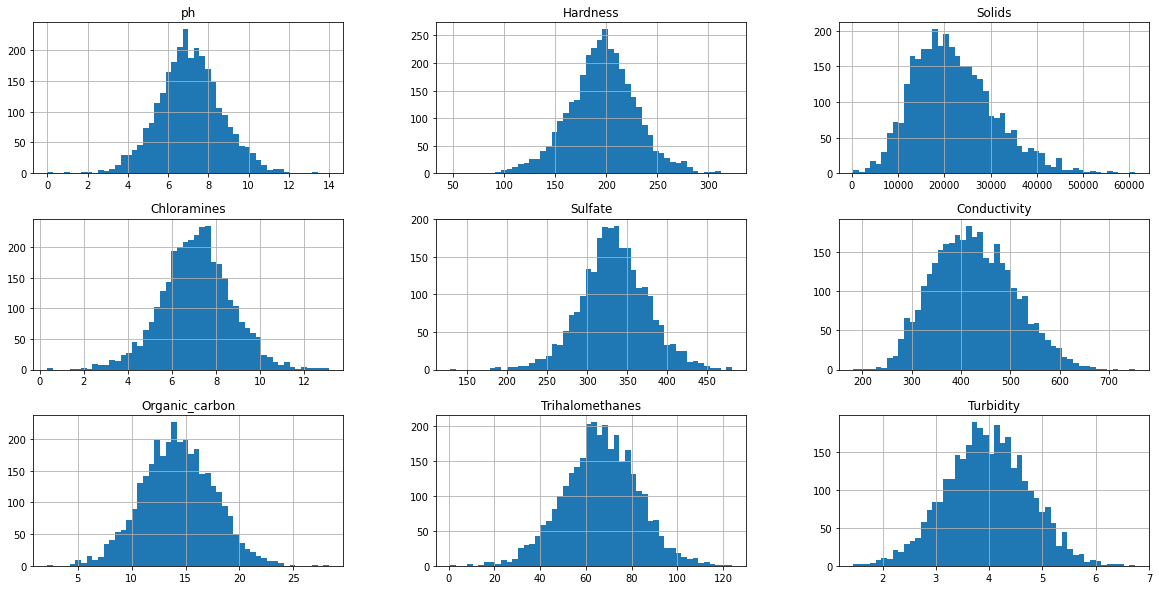

In [6]:
import matplotlib.pyplot as plt
water_quality.hist(bins = 50, figsize = (20, 10))
plt.show

Overall the data looks quite normally distributed. Solids may be slightly left skewed but still relatively normally distributed. The distribution of potability indicated an unbalanced dataset which may bias the model.

## Checking for NA's

In [7]:
water_quality["Sulfate"].isna().sum()

781

In [8]:
water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [9]:
water_quality.dropna().count()

ph                 2011
Hardness           2011
Solids             2011
Chloramines        2011
Sulfate            2011
Conductivity       2011
Organic_carbon     2011
Trihalomethanes    2011
Turbidity          2011
Potability         2011
dtype: int64

### Multiple imputation using MICE

In [10]:
# tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
# fancyimpute 0.6.0 requires numpy==1.19.5, but you have numpy 1.21.1 which is incompatible.

In [11]:
from fancyimpute import IterativeImputer as MICE
trans = MICE(verbose=False)
fitted = trans.fit(water_quality)
trans = fitted.transform(water_quality)

In [12]:
water_quality_MICE = pd.DataFrame(trans)
water_quality_MICE

,0,1,2,3,4,5,6,7,8,9
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


In [13]:
water_quality.loc[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [14]:
water_quality_MICE.loc[water_quality_MICE.isna().any(axis = 1)]

,0,1,2,3,4,5,6,7,8,9


In [15]:
water_quality[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [16]:
water_quality_MICE.columns = water_quality.columns
water_quality_MICE

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


## Distribution of data following MICE multiple imputation

Text(0.5, 0.98, 'Multi-imputed Water Quality Distribution plots')

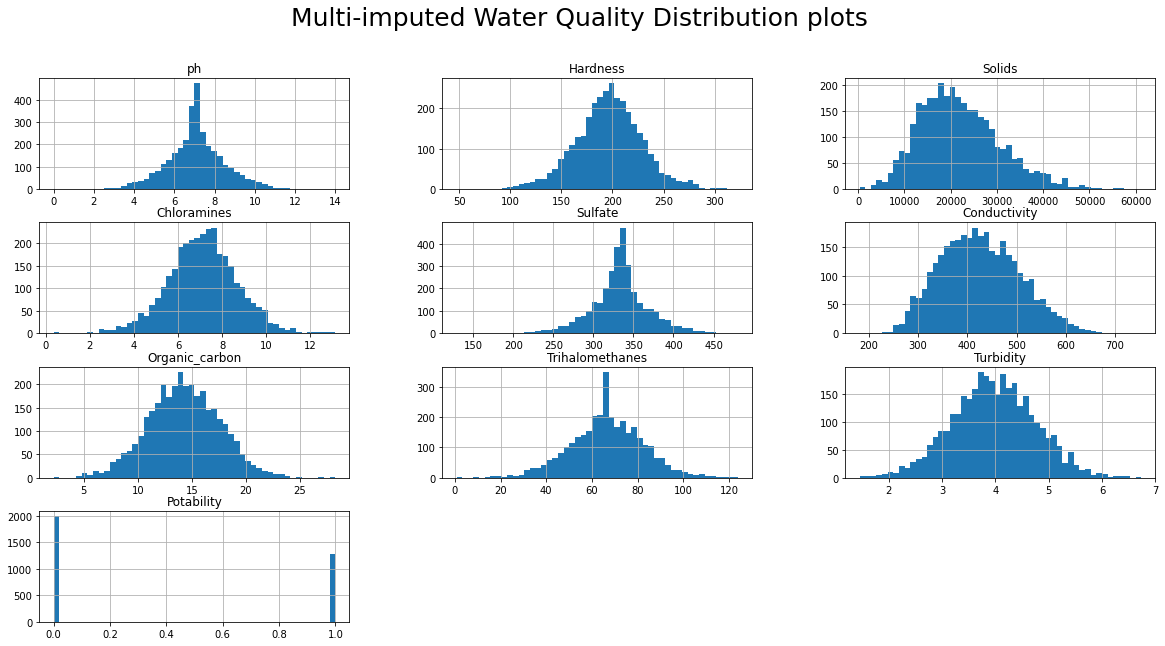

In [17]:
import matplotlib.pyplot as plt
water_quality_MICE.hist(bins = 50, figsize = (20, 10))
plt.show
plt.suptitle("Multi-imputed Water Quality Distribution plots", fontsize = 25)

Text(0.5, 0.98, 'Water Quality Distribution plots')

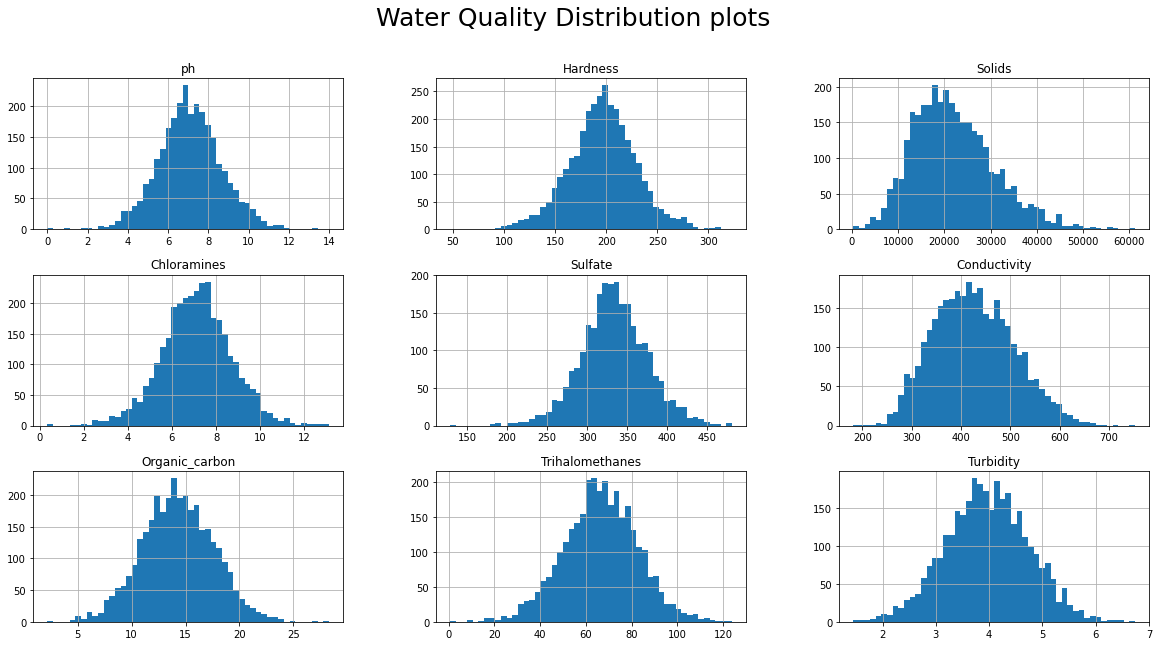

In [18]:
water_quality.hist(bins = 50, figsize = (20, 10))
plt.show
plt.suptitle("Water Quality Distribution plots", fontsize = 25)

**Key things to note:** 

1. Multiple imputation (MI) by MICE increased the frequency of values in the region of the average for ph, Sulfate and Trihalomethanes.  
2. Overall, MI does not skew the data and the data still looks relatively normally distributed. 


## Splitting datasets into train and test set

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(water_quality, water_quality["Potability"]):
    strat_train_set = water_quality.loc[train_index]
    strat_test_set = water_quality.loc[test_index]

In [20]:
strat_test_set["Potability"].value_counts()/len(strat_test_set)

0    0.609756
1    0.390244
Name: Potability, dtype: float64

In [21]:
strat_train_set["Potability"].value_counts()/len(strat_train_set)

0    0.609924
1    0.390076
Name: Potability, dtype: float64

In [22]:
water_quality_MICE["Potability"].value_counts()/len(water_quality_MICE)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

## Correlation matrix

In [23]:
cor_mat = water_quality_MICE.corr()
cor_mat["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006930
Turbidity          0.001581
ph                -0.004295
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020482
Organic_carbon    -0.030001
Name: Potability, dtype: float64

## Data Prep for ML

Transformation pipeline is created to standardise data transformations for all data being used to train the models. Specifically, the data will be fitted according to training data set values. Fitted information will be used to transform testing data set in order to compared performace between models.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from fancyimpute import IterativeImputer as MICE

# Create pipeline
pipeline = Pipeline([
    ("iterative_imputer", MICE()),
    ("std_scaler", StandardScaler())
])

# predictors
training_pred = pipeline.fit_transform(strat_train_set.drop("Potability", axis = 1))

# explanatory
training_labels = strat_train_set["Potability"].values


# Fit and transform data through pipeline 
training_pred = pd.DataFrame(training_pred)
training_pred


,0,1,2,3,4,5,6,7,8
0,-2.060687,2.866309,3.435174,0.428929,-0.982795,-0.306987,0.675031,1.347788,-1.171034
1,-1.142117,0.061368,-1.381041,0.491825,0.218438,0.953087,0.935391,0.686934,-0.516297
2,-1.057855,-0.231381,-0.682314,0.762222,0.168040,-0.769979,-0.662367,0.518162,0.567914
3,0.544464,0.656662,0.166408,0.247938,-1.539384,1.496163,-1.192995,-0.086069,-1.052787
4,-0.011839,-2.479703,-1.383888,-0.482436,0.555955,-0.133556,1.617030,-2.753360,-0.219194
...,...,...,...,...,...,...,...,...,...
2615,1.209852,-0.329925,2.239083,-2.332285,0.074982,0.427674,-0.175022,-1.549583,0.723284
2616,-0.073156,0.844455,-0.978904,-0.776862,0.079136,0.657727,0.488176,0.413354,-0.113016
2617,1.205311,-1.517112,-0.510775,0.737609,0.198509,-1.709659,0.269700,-1.536220,0.968882
2618,-0.709238,-1.341078,0.238178,0.829924,0.023136,-0.187902,-1.266505,2.600270,0.305493


# Logistic Regression

Scores: [0.62700061 0.62700061 0.62088339 0.6239495  0.6239495  0.6239495
 0.6239495  0.6239495  0.62700061 0.6239495 ]
Means: 0.624558222688033
Standard Deviation: 0.0018336713522646303


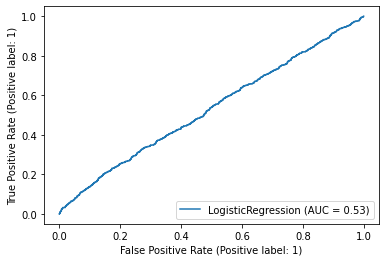

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

def display_scores(scores):
    print("Scores:", scores)
    print("Means:", scores.mean())
    print("Standard Deviation:", scores.std())

logistic_model = LogisticRegression(solver = "liblinear")
logistic_model.fit(training_pred, training_labels)
log_scores = cross_val_score(logistic_model, 
                             training_pred, 
                             training_labels,
                             scoring = "neg_mean_squared_error", cv = 10)
log_rmse_score = np.sqrt(-log_scores)
display_scores(log_rmse_score)
metrics.plot_roc_curve(logistic_model, training_pred, training_labels)

Quite a poor performing logistic regression model. ROC curve indicates the prediction accuracy is random. Detailed description of ROC curves found [here](https://acutecaretesting.org/en/articles/roc-curves-what-are-they-and-how-are-they-used).

## Creating a confusion matrix

1. Create probability prediction of training data with a threshold of 0.5.
2. Set index back to original state.
3. Create new dataframe containing scaled original data with probability predictions and thresholded prediction.
4. Using the newly created dataframe generate a confusion matrix.

In [27]:
# Two methods for prediction output. 
log_pred_water_quality_prob = logistic_model.predict_proba(training_pred)
log_pred_water_quality = logistic_model.predict(training_pred)
probability_predictions = pd.DataFrame(log_pred_water_quality_prob)
probability_predictions["Final_pred"] = np.where(probability_predictions.loc[:,1] > 0.5, 1, 0)
probability_predictions.columns = ["not_portable", "pred_portability", "final_pred"]
probability_predictions.drop("not_portable", axis = 1, inplace = True)
probability_predictions

,pred_portability,final_pred
0,0.436817,0
1,0.357308,0
2,0.405795,0
3,0.411988,0
4,0.332732,0
...,...,...
2615,0.402446,0
2616,0.357528,0
2617,0.389109,0
2618,0.444570,0


In [32]:
strat_train_set.drop("Potability", axis = 1).columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [33]:
# Joining all data back together. Need to set_index if 
# index are wrong the data does not get joined properly. NAN's coehersed

training_pred.columns = strat_train_set.drop("Potability", axis = 1).columns
water_quality_final_table = pd.concat([training_pred, 
                                       probability_predictions], axis = 1)
labels = pd.DataFrame(strat_train_set["Potability"]).astype(np.int64)
water_quality_final_table = water_quality_final_table.set_index(labels.index)
water_quality_final_table = pd.concat([water_quality_final_table, 
                                      labels], axis = 1)
water_quality_final_table

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,pred_portability,final_pred,Potability
366,-2.060687,2.866309,3.435174,0.428929,-0.982795,-0.306987,0.675031,1.347788,-1.171034,0.436817,0,1
1680,-1.142117,0.061368,-1.381041,0.491825,0.218438,0.953087,0.935391,0.686934,-0.516297,0.357308,0,0
2697,-1.057855,-0.231381,-0.682314,0.762222,0.168040,-0.769979,-0.662367,0.518162,0.567914,0.405795,0,0
2158,0.544464,0.656662,0.166408,0.247938,-1.539384,1.496163,-1.192995,-0.086069,-1.052787,0.411988,0,0
2742,-0.011839,-2.479703,-1.383888,-0.482436,0.555955,-0.133556,1.617030,-2.753360,-0.219194,0.332732,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2622,1.209852,-0.329925,2.239083,-2.332285,0.074982,0.427674,-0.175022,-1.549583,0.723284,0.402446,0,0
1920,-0.073156,0.844455,-0.978904,-0.776862,0.079136,0.657727,0.488176,0.413354,-0.113016,0.357528,0,1
2118,1.205311,-1.517112,-0.510775,0.737609,0.198509,-1.709659,0.269700,-1.536220,0.968882,0.389109,0,0
2077,-0.709238,-1.341078,0.238178,0.829924,0.023136,-0.187902,-1.266505,2.600270,0.305493,0.444570,0,0


In [34]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(water_quality_final_table.loc[:,"Potability"], 
                                  water_quality_final_table.loc[:,"final_pred"]).ravel()
(tn, fp, fn, tp)

(1597, 1, 1021, 1)

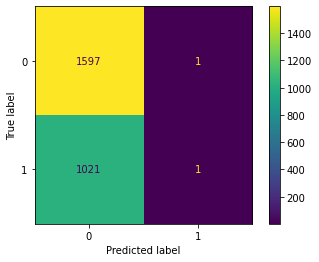

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(water_quality_final_table.loc[:,"Potability"], 
                                  water_quality_final_table.loc[:,"final_pred"])
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = logistic_model.classes_)
disp.plot()

# Decision Trees

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(training_pred, training_labels)
dt_scores = cross_val_score(dt, 
                           training_pred,
                           training_labels,
                           scoring = "accuracy", cv = 10)
#dt_tree_rmse = np.sqrt(-dt_scores)
display_scores(dt_tree_rmse)

# Get an AUC score of 1 because of over fitting of data. When testing AUC on test set the AUC is no long = 1
# metrics.plot_roc_curve(dt, training_pred, training_labels)



Scores: [0.6567326  0.61470529 0.59257492 0.6567326  0.69896325 0.67394249
 0.66825511 0.64795627 0.5828333  0.67958227]
Means: 0.6472278092784439
Standard Deviation: 0.036402891783675694


Text(0, 0.5, 'True Positive Rate')

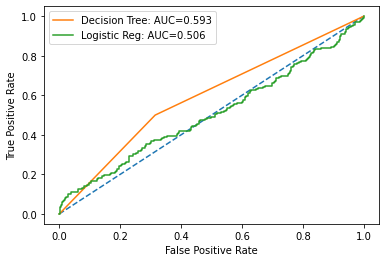

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

# Prep of testing data set
test_features = pipeline.transform(strat_test_set.drop("Potability", axis = 1))
test_labels = strat_test_set.loc[:, "Potability"]

# metrics.plot_roc_curve(model, test_features, test_labels)
# metrics.plot_roc_curve(dt, training_pred, training_labels)

# Decision tree ROC curve
dt_predictions = dt.predict_proba(test_features)[:,1]
dt_auc = roc_auc_score(test_labels,dt_predictions)
dt_label = 'Decision Tree: AUC=%.3f' % (dt_auc)

# Logistic Reg ROC curv
log_predictions = logistic_model.predict_proba(test_features)[:,1]
log_auc = roc_auc_score(test_labels, log_predictions)
log_label = 'Logistic Reg: AUC=%.3f' % (log_auc)

#Calculate and plot roc_curve
dt_fpr,dt_tpr, dt_threshold =  roc_curve(test_labels,dt_predictions)
log_fpr, log_tpr, log_threshold =  roc_curve(test_labels,log_predictions)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(dt_fpr,dt_tpr, label = dt_label)
plt.plot(log_fpr,log_tpr, label = log_label)
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


    

    

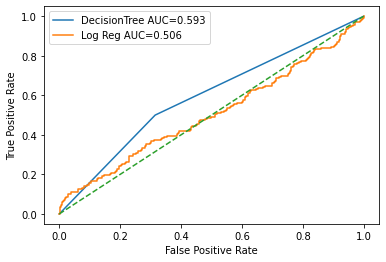

In [88]:
model_list = {"DecisionTree":dt,
              "Log Reg":logistic_model}

# Function to create ROC plot of multiple models.
def plot_multi_roc(model, features, labels):
    
    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib import pyplot as plt
    
    if type(model) != dict:
        raise NameError("Not Valid Dict")
        
    for key in model_list:
        model = model_list[key]
        predictions = model.predict_proba(features)[:,1]
        auc = roc_auc_score(labels, predictions)
        fig_label = "%s AUC=%.3f" % (key, auc)
        fpr, tpr, threshld = roc_curve(labels, predictions)
        plt.plot(fpr, tpr, label = fig_label)
    
    plt.plot([0,1],[0,1], linestyle = '--')
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_multi_roc(model_list, test_features, test_labels)


# Randomforest classifier

DecisionTreeClassifier()
